<a href="https://colab.research.google.com/github/aurora32s/python_study/blob/master/2022%EB%85%84_2%EC%9B%94_1%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 괄호 추가하기 (16637번)

## 문제
길이가 N인 수식이 있다. 수식은 0보다 크거나 같고, 9보다 작거나 같은 정수와 연산자 (+,-,x)로 이루어져 있다. 연산자 우선순위는 모두 동일하기 때문에, 수식을 계산할 때는 왼쪽에서부터 순서대로 계산해야 한다. 예를 들어, 3+8x7-9x2의 결과는 136이다.

수식에 괄호를 추가하면, 괄호 안에 들어있는 식은 먼저 계산해야 한다. 단, 괄호 안에는 연산자가 하나만 들어 있어야 한다. 예를 들어, 3+8x7-9x2에 괄호를 3+(8x7)-(9x2)와 같이 추가했으면, 식의 결과는 41이 된다. 하지만, 중첩된 괄호는 사용할 수 없다. 즉, 3+((8x7)-9)x2, 3+((8x7)-(9x2))은 모두 괄호 안에 괄호가 있기 떄문에, 올바른 식이 아니다.

수식이 주어졌을 때, 괄호를 적절히 추가해 만들 수 있는 식의 결과의 최댓값을 구하는 프로그래을 작성하시오. 추가하는 괄호 개수의 제한은 없으며, 추가하지 않아도 된다.

## 입력
첫째 줄에 수식의 길이 N(1<=N<=19)가 주어진다. 둘째 줄에는 수식이 주어진다. 수식에 포함된 정수는 모두 0보다 크거나 같고, 9보다 작거나 같다. 문자열은 정수로 시작하고, 연산자와 정수가 번갈아가면서 나온다. 연산자는 (+,-,x) 중 하나이며, 여기서 *는 곱하기 연산을 나타내는 x 연산이다. 항상 올바른 수식만 주어지기 떄문에, N은 홀수이다.

## 출력
첫째 줄에 괄호를 적절히 추가해서 얻을 수 있는 결과의 최댓값을 출력한다. 정답은 2^31보다 작고, -2^31보다 크다.





In [ ]:
n = int(input()) // 2 + 1

numbers = []
operator = []
for index, s in enumerate(input()) :
  if index % 2 == 0 :
    numbers.append(int(s))
  else :
    operator.append(s)

def calculator (a, b, op) :
  if operator[op] == '+' :
    return a+b
  elif operator[op] == '-' :
    return a-b
  else :
    return a*b

if n == 1 :
  print(numbers[0])
elif n == 2 :
  print(calculator(numbers[0],numbers[1],0))
else :
  dp = [[0]*2 for _ in range(n)]
  dp[0][0] = dp[0][1] = numbers[0]
  dp[1][0] = dp[1][1] = calculator(numbers[0], numbers[1], 0)

  for i in range(2 , n) :
    result = []
    result.append(calculator(dp[i-2][0], calculator(numbers[i-1],numbers[i], i-1), i-2))
    result.append(calculator(dp[i-2][1], calculator(numbers[i-1],numbers[i], i-1), i-2))
    result.append(calculator(dp[i-1][0], numbers[i], i-1))
    result.append(calculator(dp[i-1][1], numbers[i], i-1))
    dp[i][0] = min(result)
    dp[i][1] = max(result)

print(dp[n-1][1])

19
1*2+3*4*5-6*7*8*9*9
[[1, 1], [2, 2], [5, 5], [14, 20], [70, 100], [-20, 94], [-140, 658], [-1120, 5264], [-10080, 47376], [-90720, 426384]]


# 캐슬 디펜스 (17135번)

## 문제
캐슬 디펜스는 성을 향해 몰려오는 적을 잡는 턴 방식의 게임이다. 게임이 진행되는 곳은 크기가 N X M인 격자판으로 나타낼 수 있다. 격자판은 1X1 크기의 칸으로 나누어져 있고, 각 칸에 포함된 적의 수는 최대 하나이다. 격자판의 N번행의 바로 아래 (N+1번 행)의 모든 칸에는 성이 있다.

성을 적에게서 지키기 위해 궁수 3명을 배치하려고 한다. 궁수는 성이 있는 칸에 배치할 수 있고, 하나의 칸에는 최대 1명의 궁수만 있을 수 있다.
- 각각의 턴마다 궁수는 적 하나를 공격할 수 있고, 모든 궁수는 동시에 공격한다.
- 궁수가 공격하는 적은 거리가 D 이하인 적 중에서 가장 가까운 적이고, 그러한 적이 여럿일 경우에는 가장 왼쪽에 있는 적을 공격한다.
- 같은 적이 여러 궁수에게 공격당할 수 있다.
- 공격받은 적은 게임에서 제외된다.
- 궁수의 공격이 끝나면, 적이 이동한다.
- 적은 아래로 한칸 이동하며, 성이 있는 칸으로 이동한 경우에는 게임에서 제외된다. 모든 적이 격자판에서 제외되면 게임이 끝난다.

게임 설명에서 보다시피 궁수를 배치한 이후의 게임 진행은 정해져있다. 따라서, 이 게임은 궁수의 위치가 중요하다. 격자판의 상태가 주어졌을 때, 궁수의 공격으로 제거할 수 있는 적의 최대 수를 계산하보자.

격자판의 두 위치 (r1,c1),(r2,c2)의 거리는 |r1-r2|+|c1-c2|이다.

## 입력
첫째 줄에 격자판의 행의 수 N, 열의 수 M, 궁수의 공격 거리 제한 D가 주어진다. 둘째 줄부터 N개의 줄에는 격자판의 상태가 주어진다. 0은 빈 칸, 1은 적이 있는 칸이다.

## 출력
첫째 줄에 궁수의 공격으로 제거할 수 있는 적의 최대 수를 출력한다.

In [ ]:
from itertools import combinations

n,m,k = map(int, input().split())
maps = [list(map(int, input().split())) for _ in range(n)]
achors = list(combinations(range(0,m),3))

def countAttack (attack) :
  tmp = 0
  for i in range(n) :
    for j in range(m) :
      if attack[i][j] >= 1 :
        tmp += 1
        attack[i][j] = -1
  return tmp

answer = 0
def shot (row, a, attack) :
  for scope in range(1,k+1) :
    for j in range(-scope+1, scope) :
      i = scope - abs(j) - 1
      ny, nx = row - i, a + j
      if ny >= 0 and 0 <= nx < m :
        if maps[ny][nx] == 1 and attack[ny][nx] >= 0 :
          attack[ny][nx] += 1
          return

for achor in achors :
  result = 0
  attack = [[0] * m for _ in range(n)]
  for row in range(n-1,-11,-1) :
    for index, a in enumerate(achor) :
      shot(row, a, attack)
    result += countAttack(attack)
  answer = max(answer, result)

print(answer)

6 5 2
1 0 1 0 1
0 1 0 1 0
1 1 0 0 0
0 0 0 1 1
1 1 0 1 1
0 0 1 0 0
14


# 2146. 다리 만들기
|시간 제한|메모리 제한|
|-----|-----|
|2초|192MB|

## 문제
여러 섬으로 이루어진 나라가 있다. 이 나라의 대통령은 섬을 잇는 다리를 만들겠다는 공약으로 인기몰이를 해 당선될 수 있었다. 하지만 막상 대통령에 취임하자, 다리를 놓는다는 것이 아깝다는 생각을 하게 되었다. 그래서 그는, 생생내는 식으로 한 섬과 다른 섬을 잇는 다리 하나만을 만들기로 하였고, 그 또한 다리를 가장 짧게 하여 돈을 아끼려 하였다.

이 나라는 NxN 크기의 이차원 평면상에 존재한다. 이 나라는 여러 섬으로 이루어져 있으며, 섬이란 동서남북으로 육지가 붙어있는 덩어리를 말한다. 다음은 세 개의 섬으로 이루어진 나라의 지도이다.

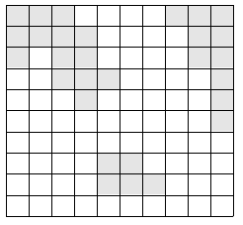

위의 그림에서 색이 있는 부분이 육지이고, 색이 없는 부분이 바다이다. 이 바다에 가장 짧은 다리를 놓아 두 대륙을 연결하고자 한다 가장 짧은 다리란, 다리가 격자에서 차지하는 칸의 수가 가장 작은 다리를 말한다. 다음 그림에서 두 대륙을 연결하는 다리를 볼 수 있다.

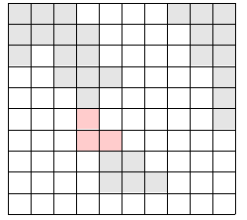

물론 위의 방법 외에도 다리를 놓는 방법이 여러 가지 있으나, 위의 경우가 놓는 다리의 길이가 3으로 가장 짧다(물론 길이가 3인 다른 다리를 놓을 수 있는 방법도 몇 가지 있다.)

지도가 주어질 때, 가장 짧은 다리 하나를 놓아 두 대륙을 연결하는 방법을 찾으시오.

## 입력
첫 줄에는 지도의 크기 N(1<=N<=100)가 주어진다. 그 다음 N줄에는 N개의 숫자가 빈칸을 사이에 두고 주어지며, 0은 바다, 1은 육지를 나타낸다. 항상 두 개 이상의 섬이 있는 데이터만 입력으로 주어진다.

## 출력
첫째 줄에 가장 짧은 다리의 길이를 출력한다.

In [ ]:
n = int(input())
maps = [list(map(int,input().split())) for _ in range(n)]

INF = int(1e9)
dx = [0,1]
dy = [1,0]
dp = [[INF] * n for _ in range(n)]
q = []
q.append((0,0))
dp[0][0]  = 0 if maps[0][0] == 1 else 1

answer = INF
while q :
  y,x = q.pop(0)

  for dir in range(2) :
    nx, ny = x + dx[dir], y + dy[dir]
    if nx < 0 or n <= nx or ny < 0 or n <= ny :
      continue

    if maps[y][x] == 1 :
      if maps[ny][nx] == 1 and dp[ny][nx] != -1 :
        dp[ny][nx] = -1
        q.append((ny,nx))
      elif maps[ny][nx] == 0 :
        dp[ny][nx] = 1
        q.append((ny,nx))
    else :
      if maps[ny][nx] == 1 and dp[ny][nx] != -1 :
        dp[ny][nx] = -1
        q.append((ny,nx))
        answer = min(answer, dp[y][x])
      elif maps[ny][nx] == 0 and dp[ny][nx] > dp[y][x] + 1:
        dp[ny][nx] = dp[y][x] + 1
        q.append((ny,nx))

print(dp)
print(answer)

10
1 1 1 0 0 0 0 1 1 1
1 1 1 1 0 0 0 0 1 1
1 0 1 1 0 0 0 0 1 1
0 0 1 1 1 0 0 0 0 1
0 0 0 1 0 0 0 0 0 1
0 0 0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0 0 0
0 0 0 0 1 1 0 0 0 0
0 0 0 0 1 1 1 0 0 0
0 0 0 0 0 0 0 0 0 0
[[0, -1, -1, 1, 2, 3, 4, -1, -1, -1], [-1, -1, -1, -1, 1, 2, 3, 1, -1, -1], [-1, 1, -1, -1, 1, 2, 3, 2, -1, -1], [1, 2, -1, -1, -1, 1, 2, 3, 1, -1], [2, 3, 1, -1, 1, 2, 3, 4, 2, -1], [3, 4, 2, 1, 2, 3, 4, 5, 3, -1], [4, 5, 3, 2, 3, 4, 5, 6, 4, 1], [5, 6, 4, 3, -1, -1, 1, 2, 3, 2], [6, 7, 5, 4, -1, -1, -1, 1, 2, 3], [7, 8, 6, 5, 1, 1, 1, 2, 3, 4]]
1


# 색종이 붙이기 (17136번)

|시간 제한|메모리 제한|
|-----|-----|
|1초|512MB|

## 문제
<그림 1>과 같이 정사각형 모양을 한 다섯 종류의 색종이가 있다.색종이의 크기는 1x1, 2x2, 3x3, 4x4, 5x5로 총 다섯 종류가 있으며, 각 종류의 색종이는 5개씩 가지고 있다.

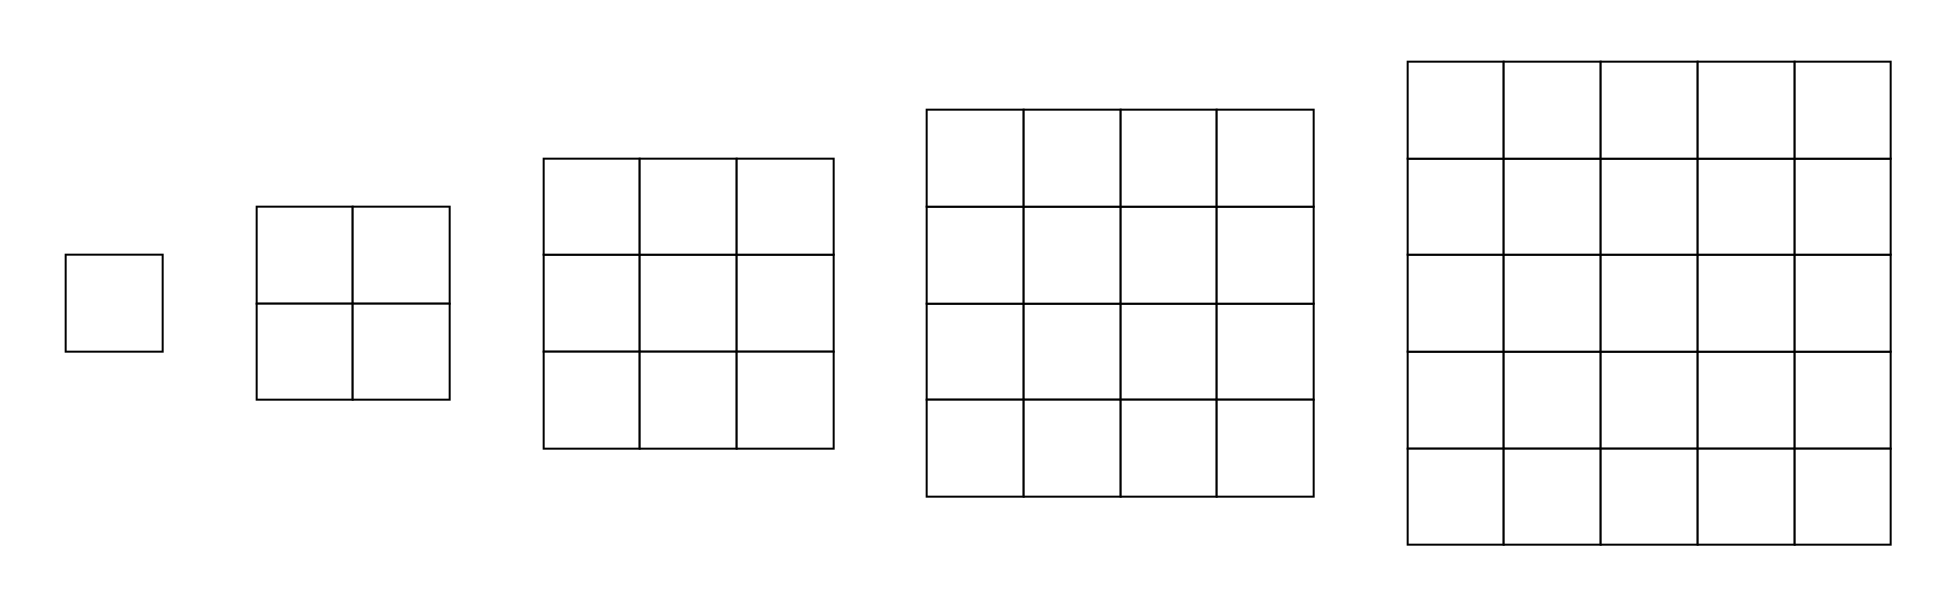

색종이를 크기가 10x10인 종이 위에 붙이려고 한다. 종이는 1x1 크기의 칸으로 나누어져 있으며, 각각의 칸에는 0 또는 1이 적혀 있다. 1이 적인 칸은 모두 색종이로 덮어져야 한다. 색종이를 붙일 때는 종이의 경게 밖으로 나가서는 안되고, 겹쳐도 안 된다. 또, 칸의 경계와 일치하게 붙여야 한다. 0 이 적힌 칸에는 색종이가 있으면 안 된다.

종이가 주어졌을 때, 1이 적인 모든 칸을 붙이는데 필요한 색종이의 최소 개수를 구해보자.

## 입력
총 10개의 줄에 종이의 각 칸에 적힌 수가 주어진다.

## 출력
모든 1을 덮는데 필요한 색종이의 최소 개수를 출력한다. 1을 모두 덮는 것이 불가능한 경우에는 -1을 출력한다.

In [48]:
maps = [list(map(int, input().split())) for _ in range(10)]

def check (x,y,scope) :
  if x + scope >= 10 or y + scope >= 10 :
    return False
  
  for i in range(scope + 1) :
    for j in range(i + 1) :
      if maps[x+i][y+j] != 1 or maps[x+j][y+i] != 1 :
        return False
  return True

answer = 26
paper = [5,5,5,5,5]

def use (x,y,scope, num) :
  for i in range(scope+1) :
    for j in range(scope+1) :
      maps[x+i][y+j] = num
  paper[scope] += -1 if num == 0 else 1

def solve (x,y) :
  global answer
  if y >= 10 : x, y = x+1, 0
  if x >= 10 :
    answer = min(answer, 25 - sum(paper))
    return
  if maps[x][y] == 0 :
    solve(x,y+1)
  else :
    for i in range(0,5) :
      if paper[i] > 0:
        if check(x,y,i) :
          use(x,y,i,0)
          solve(x,y+1)
          use(x,y,i,1)
        else :
          break
solve(0,0)
print(-1) if answer == 26 else print(answer)

0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0


In [ ]:
maps